In [1]:
import numpy as np
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt

# Question number 1- Create a data and draw it.
In question number 1, I create a data with 1,000 points that the first team has a 700 points and vector of means [-1,-1] and covarience matrix of (corolation) is [[0.8, 0], [0, 0.8]]
The second team has a 300 points with ector of means [1,1] and covarience matrix of (corolation) is [[0.75, -0.2], [-0.2, 0.6]]
Also I am normalized the data.

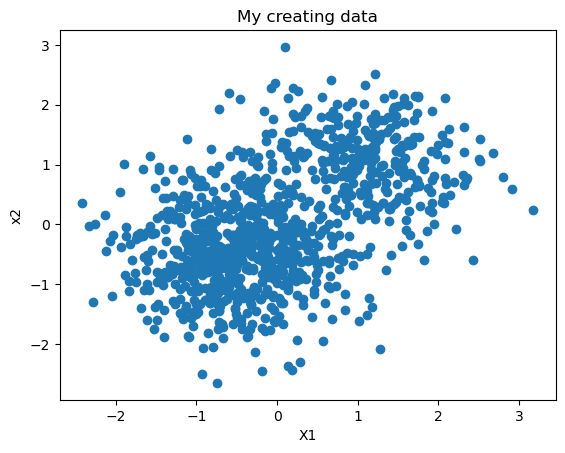

In [2]:
# same random for diffrent runs
np.random.seed(0)

#make the first team
mean_vec_team1 = [-1, -1]  # calculate the vector avarage
Covariance_matrix_team1 = [[0.8, 0], [0, 0.8]]  # Covariance matrix for first team
team1_points = np.random.multivariate_normal(mean_vec_team1, Covariance_matrix_team1, 700)

#make the second team
mean_vec_team2 = [1, 1]  # calculate the vector avarage
Covariance_matrix_team2 = [[0.75, -0.2], [-0.2, 0.6]]  # Covariance matrix for first team
team2_points = np.random.multivariate_normal(mean_vec_team2, Covariance_matrix_team2, 300)

# Concatenate the points of both teams to create the dataset
x_data = np.concatenate((team1_points, team2_points), axis=0)
#normalized
scaler = preprocessing.StandardScaler() #creae object of normalize
x_data_scaler = scaler.fit_transform(x_data) #normalize the data x - have a lot of option to normalize

# Print the shape of the dataset (should be (1000, 2))
#print("my x_data is :", x_data)
#x_data_shape = (len(x_data), len(x_data[0])) #print the rows and column
#print ("The shape is:" +str(x_data_shape));


# Scatter plot of the dataset
plt.scatter(x_data_scaler[:, 0], x_data_scaler[:, 1])

plt.xlabel("X1")
plt.ylabel("x2")
plt.title("My creating data")
plt.show()

# Explain of draw
Like we learn on the lecture, the standard deviation is rotated, beacuse the general struction of covarience matrix is 
[[standard deviation-1, num1], [num2, standard deviation-1]], such that num1!=0 and num2!=0 that create the rotated and the plot  no symetrie (compare to num1 and num 2 has a vlue zero).
When num1 and num 2> 0--> then when x1 rise up then x2 rise up.
But when num1 and num 2< 0 --> when x1 rise up then x2 fall down.

# Question number 1- Kmeans algorithm

Method that implement the k-means algorithm.
diff_bet_x_and_centers- calculate the distance for each data point to the center.
labels- will take the minimun of distance (for which data close to who is center).
Then we wil update the center of data.

In [3]:
def kmeans_implement (x,max_iter,k): 
    np.random.seed(2) #random const
    
    #print("x data", x)
    #generates random values from a standard normal distribution for each cluster center.
    array_centers = np.random.randn(k, x.shape[1]) #the first random before iteration (x,y) for each center it's shape- (2,2)
    #update diff and labels 
    for _ in range(max_iter): 
        #x shape- (1000,2), array_center (2,2)--> calculate the diff for each point to the center
        #diff_bet_x_and_centers is (1000,2)
        diff_bet_x_and_centers = np.linalg.norm(x[:, np.newaxis] - array_centers, axis=-1)
        
        #labels--> calculate the minimize diff by arg.min
        labels = np.argmin(diff_bet_x_and_centers, axis=-1)
        #labels- will save which class is it, shape(1000, )
        
        #print("diff_bet_x_and_centers: \n",diff_bet_x_and_centers)
        #print ("LABELS IS: \n",labels)
        
        #Update centers
        for i in range(k):#moves on centers in centers [0] and centers [1]
            #each place that labels==i in ndarray labels, it's will show on x_data
            #will take the rows in x that has a label=i in ndarray labels
            array_centers[i] = np.mean(x[labels == i], axis=0) #x that has a label zero will input to array_centers in location zero
            #print("x:", x[labels == i])
    return labels, array_centers

Method that plot the result of kmeans for sum number of iteration

In [4]:
def plot_k_means (num_iter):
    k = 2
    labels, array_center = kmeans_implement(x_data_scaler, num_iter, k)
    
    #plot the scatter od data
    #print("x_data_scaler: ", x_data_scaler)
    #print (labels)
    #print (type(labels))
    #print(np.shape(labels))
    
    for j in range(k):
        plt.scatter(x_data_scaler[labels == j, 0], x_data_scaler[labels == j, 1], label=f'Team {j+1}')

    #plot the centers
    plt.scatter(array_center[:, 0], array_center[:, 1], c='black', marker='x', label='means centers')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("K-means in iter "+ str(num_iter))
    plt.legend()
    plt.show()

Take a some cases of iteration and plot them

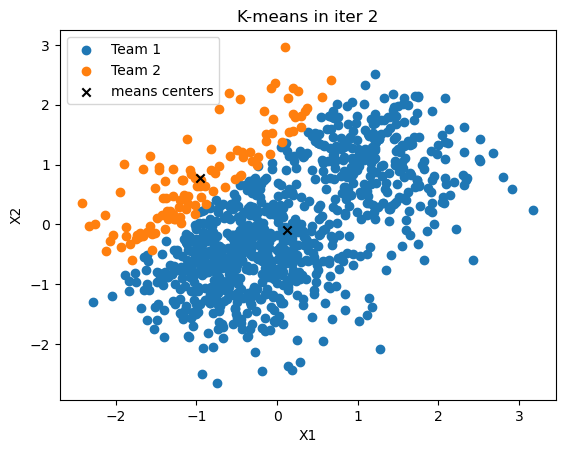

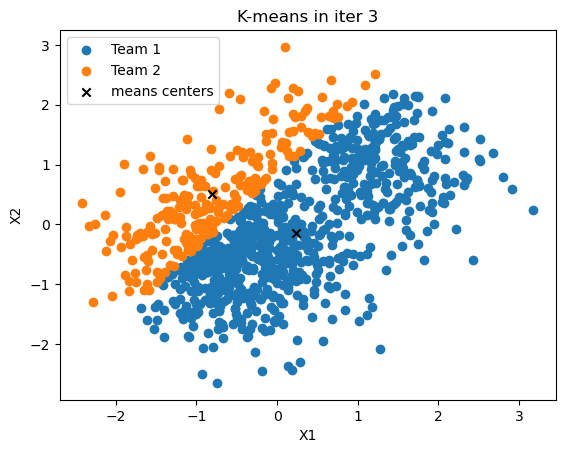

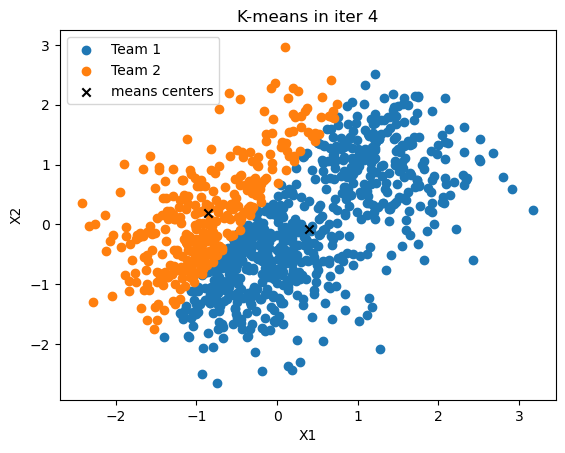

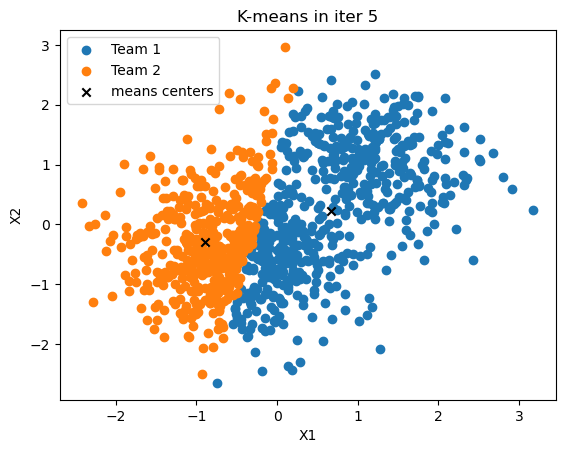

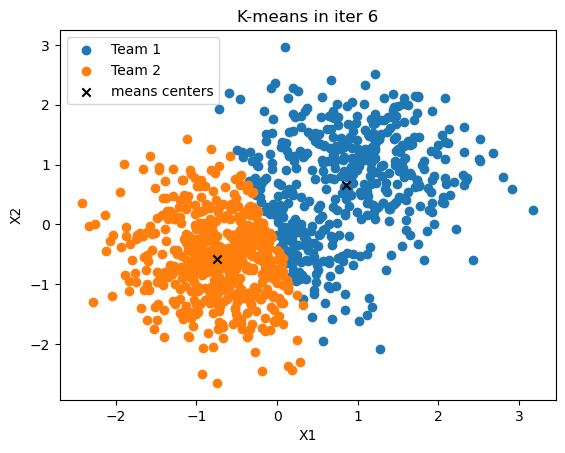

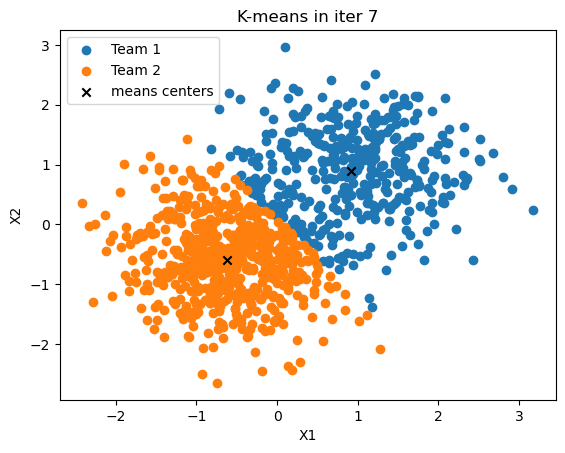

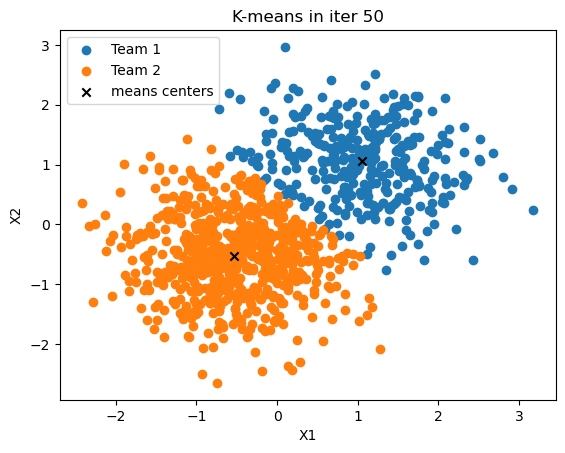

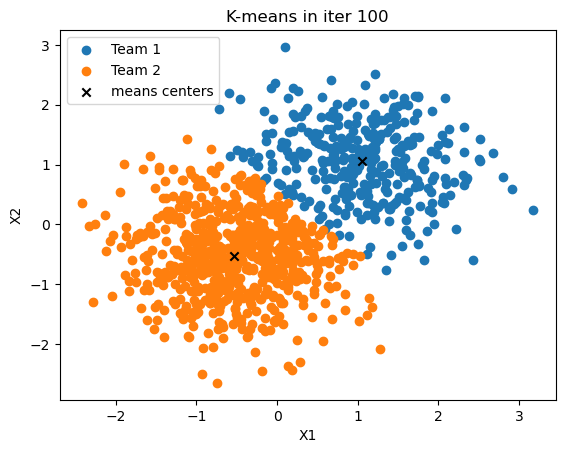

In [5]:
plot_k_means (2)
plot_k_means (3)
plot_k_means (4)
plot_k_means (5)
plot_k_means (6)
plot_k_means (7)
plot_k_means (50)
plot_k_means (100)

# Explain of k_means plot
I running k_means algorithm on 3 iteration: 
1. max iteration=2-7
2. max iteration=50
3. max iteration=100

I mark the centers in symbol 'x', Team number 1 is blue color, and Team number 2 is orange color.

I see a diffrent divided of data to teams in diffrent iteration.
In iter num 2- I will see the Team 2 is a smaller then Team 1, it's mean that the centers and the num of iter is not good enought.

But when I raising the num of iter between iter num 2 to iter number 7, I see that orange group is grew too.
In iter number 50 I see a few changes between it to iter number 7. beacuse the centers located in a good place for each team.
In iter number 100- I see a few changes from the iter number 50 ,that beacuse the centers located in a good place for each team from the iter number 50, and don't has a changes in the located of centers for each team.

Conclusion: As you can see, I take a worst divided of group in the begining, but the algroithm knows how to fix it to a good divide between the points to a team, and also the centers are changes to a good position on each team that it has.